In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from sklearn.metrics import classification_report
import time

In [ ]:
from google.colab import drive
import os

# Mountinf Google Drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:

# Update the directory path to the folder in your Google Drive
directory = '/content/drive/MyDrive/Final Year Project - Hrikiss Chitrakar/dataset-3'

# List contents and count directories
contents = os.listdir(directory)
num_of_dirs = len([name for name in contents if os.path.isdir(os.path.join(directory, name))])

# Print contents
print("Contents of the directory:")
for item in contents:
    print(item)

print(f"\nNumber of directories: {num_of_dirs}")

Contents of the directory:
train
test
val

Number of directories: 3


In [ ]:
# Update the directory path to the folder in your Google Drive
directory = '/content/drive/MyDrive/Final Year Project - Hrikiss Chitrakar/dataset-3/test'

# List contents and count directories
contents = os.listdir(directory)
num_of_dirs = len([name for name in contents if os.path.isdir(os.path.join(directory, name))])

# Print contents
print("Contents of the directory:")
for item in contents:
    print(item)

print(f"\nNumber of directories: {num_of_dirs}")

Contents of the directory:
Potato___Early_blight
Tomato___Late_blight
Grape___Black_rot
Tomato___Tomato_mosaic_virus
Peach___healthy
Strawberry___healthy
Tomato___Target_Spot
Corn_(maize)___healthy
Potato___Late_blight
Pepper,_bell___healthy
Chili__healthy
Apple___Cedar_apple_rust
Cherry_(including_sour)___Powdery_mildew
Grape___healthy
Tomato___Leaf_Mold
Tomato___Bacterial_spot
Tomato___Early_blight
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Chili__yellowish
Coffee__red spider mite
Grape___Esca_(Black_Measles)
Cherry_(including_sour)___healthy
Chili__leaf curl
Corn_(maize)___Common_rust_
Tomato___healthy
Apple___Apple_scab
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Coffee__Rust
Corn_(maize)___Northern_Leaf_Blight
Chili__whitefly
Apple___Black_rot
Tomato___Septoria_leaf_spot
Strawberry___Leaf_scorch
Peach___Bacterial_spot
Chili__leaf spot
Pepper,_bell___Bacterial_spot
Apple___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Coffee__he

In [ ]:
# Update the directory path to the folder in your Google Drive
directory = '/content/drive/MyDrive/Final Year Project - Hrikiss Chitrakar/dataset-3/train'

# List contents and count directories
contents = os.listdir(directory)
num_of_dirs = len([name for name in contents if os.path.isdir(os.path.join(directory, name))])

# Print contents
print("Contents of the directory:")
for item in contents:
    print(item)

print(f"\nNumber of directories: {num_of_dirs}")

Contents of the directory:
Potato___Late_blight
Grape___Black_rot
Potato___Early_blight
Tomato___Late_blight
Corn_(maize)___healthy
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Strawberry___healthy
Peach___healthy
Grape___healthy
Cherry_(including_sour)___Powdery_mildew
Coffee__red spider mite
Pepper,_bell___healthy
Tomato___Bacterial_spot
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Apple___Cedar_apple_rust
Chili__yellowish
Tomato___Leaf_Mold
Chili__healthy
Corn_(maize)___Northern_Leaf_Blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Chili__leaf curl
Corn_(maize)___Common_rust_
Cherry_(including_sour)___healthy
Tomato___healthy
Coffee__Rust
Grape___Esca_(Black_Measles)
Apple___Apple_scab
Tomato___Early_blight
Apple___Black_rot
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Peach___Bacterial_spot
Pepper,_bell___Bacterial_spot
Tomato___Septoria_leaf_spot
Chili__leaf spot
Apple___healthy
Tomato___Spider_mites Two-spotted_spider_mite
Chili__whitefly
Coffee__healthy
Potato___healthy
St

In [ ]:
from PIL import Image
import os


directory_path = '/content/drive/MyDrive/Final Year Project - Hrikiss Chitrakar/dataset-3/train'

file_names = os.listdir(directory_path)

# Load images from the directory
images = []
for file_name in file_names:
    if file_name.endswith('.png') or file_name.endswith('.jpg') or file_name.endswith('.jpeg'):
        image_path = os.path.join(directory_path, file_name)
        image = Image.open(image_path)
        images.append(image)

# Process the images as required
#for image in images:
    # Perform operations on each image
    # ...
 #   image.show()

# Example: Showing the first image
if images:
    images[0].show()
else:
    print("No images found in the directory.")

No images found in the directory.


In [ ]:
# Defining parameters for the AI model
batch_size = 64
num_epochs = 5
image_size = (139, 139)
num_classes = 42

In [ ]:
# Load the InceptionV3 model
image_input = Input(shape=(*image_size, 3))
inception_model = InceptionV3(input_tensor=image_input, weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import os
import shutil
import random

def create_validation_split(source_dir, val_dir, val_split=0.2):
    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            # Get all image files in the class directory
            images = [img for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))]
            random.shuffle(images)  # Shuffle to randomize selection

            # Calculate number of validation images
            val_size = int(len(images) * val_split)
            val_images = images[:val_size]  # Take the first val_size images after shuffling

            # Create target validation directory
            os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

            # Copy validation images to the validation directory
            for img in val_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

# Source directory for train data
train_dir = '/content/drive/MyDrive/Final Year Project - Hrikiss Chitrakar/dataset-3/train'

# Validation directory to be created
val_dir = '/content/drive/MyDrive/Final Year Project - Hrikiss Chitrakar/dataset-3/val'

# Create validation split with 20% of images
create_validation_split(train_dir, val_dir, val_split=0.2)

In [ ]:
# Add a new classification layer
x = inception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
class_outputs = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Create the model
model = Model(inputs=inception_model.input, outputs=class_outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Load the training data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_dataset = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Final Year Project - Hrikiss Chitrakar/dataset-3/train',
    target_size=image_size,
    batch_size=64,
    class_mode='categorical'
)

# Load the validation data
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_dataset = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Final Year Project - Hrikiss Chitrakar/dataset-3/val',
    target_size=image_size,
    batch_size=64,
    class_mode='categorical'
)

# Train the model and store the history
history = model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset)

# Evaluate the model on the test data
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_dataset = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Final Year Project - Hrikiss Chitrakar/dataset-3/test',
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical'
)

# Save the model
model.save('plant_disease_model.h5')

Found 33121 images belonging to 42 classes.
Found 11895 images belonging to 42 classes.
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


518/518 ━━━━━━━━━━━━━━━━━━━━ 9204s 18s/step - accuracy: 0.5254 - loss: 1.8509 - val_accuracy: 0.9375 - val_loss: 0.1938
Epoch 2/5
518/518 ━━━━━━━━━━━━━━━━━━━━ 7747s 15s/step - accuracy: 0.9243 - loss: 0.2785 - val_accuracy: 0.9237 - val_loss: 0.2972
Epoch 3/5
518/518 ━━━━━━━━━━━━━━━━━━━━ 7766s 15s/step - accuracy: 0.9513 - loss: 0.1717 - val_accuracy: 0.9616 - val_loss: 0.1171
Epoch 4/5
518/518 ━━━━━━━━━━━━━━━━━━━━ 8004s 15s/step - accuracy: 0.9631 - loss: 0.1322 - val_accuracy: 0.9715 - val_loss: 0.0893
Epoch 5/5
518/518 ━━━━━━━━━━━━━━━━━━━━ 7976s 15s/step - accuracy: 0.9714 - loss: 0.1003 - val_accuracy: 0.9769 - val_loss: 0.0743
Found 8379 images belonging to 41 classes.


In [ ]:
# Save the model in native Keras format
model.save('plant_disease_model_inception.keras')

import joblib

# Save the model using joblib
joblib.dump(model, 'plant_disease_model_inception.pkl')

['plant_disease_model_inception.pkl']

In [ ]:
# Save model weights
model.save_weights('model.weights.h5')

# Save model configurations (architecture, optimizer state, etc.)
model_config = model.get_config()
with open('model_config.pkl', 'wb') as config_file:
    joblib.dump(model_config, config_file)

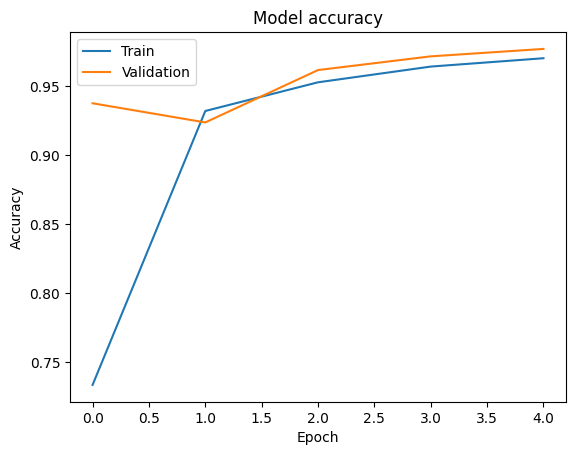

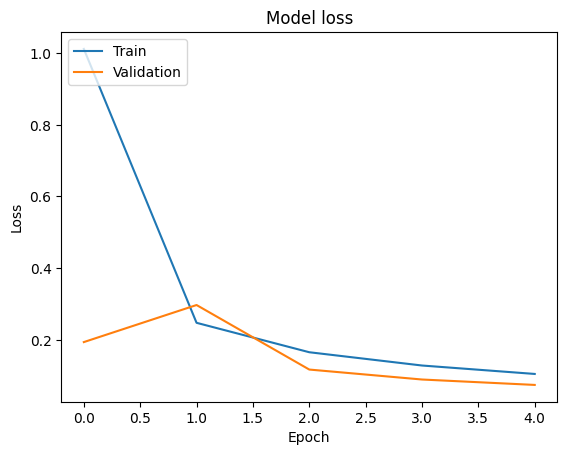

In [ ]:
# Plot the metrics to visualize the training process
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_metrics(history)

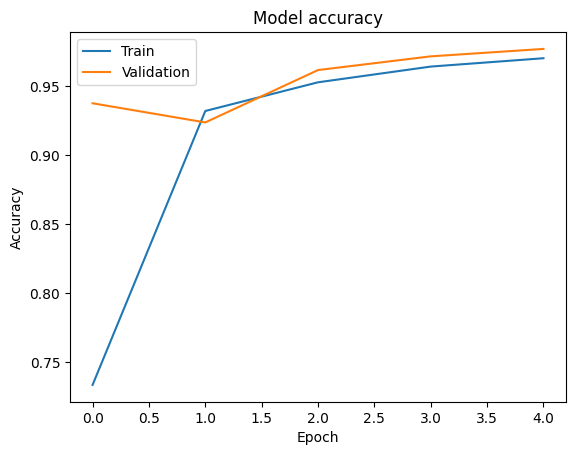

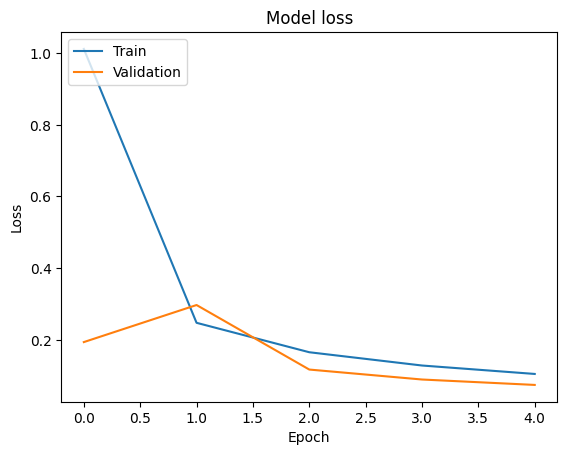

In [ ]:
# Plot the metrics to visualize the training process
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_metrics(history)